In [4]:
import pandas as pd
import numpy as np 

In [6]:
data = pd.read_csv('Master_DB.csv')

In [8]:
data = data.drop(columns=['year_x', 'id', 'track_id', 'features'])

In [10]:
import numpy as np

# Calculate the percentile thresholds
low_threshold = np.percentile(data['popularity'], 50)
high_threshold = np.percentile(data['popularity'], 50)

# Create the 'popularity_class' column based on conditions
data['popularity_class'] = np.select(
    [
        data['popularity'] <= low_threshold,              # Low popularity (0)
        (data['popularity'] > low_threshold) & (data['popularity'] <= high_threshold),  # Neutral (1)
        data['popularity'] > high_threshold               # High popularity (2)
    ],
    [0, 1, 1]  # Assign corresponding class values
)

# Check the distribution of the new column
print(data['popularity_class'].value_counts())

popularity_class
0    70819
1    68614
Name: count, dtype: int64


In [12]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'artist_name' column
data['artist_encoded'] = label_encoder.fit_transform(data['artist_name'])

In [14]:
label_encoder_genre = LabelEncoder()

# Fit and transform the 'genre' column
data['genre_encoded'] = label_encoder_genre.fit_transform(data['genre'])

In [16]:
selected_features = [
    'lyric_page_counter', 'sentiment', 'word_count', 'num_parts', 'year_y',
    'artist_encoded', 'genre_encoded', 
    'positive_sentiment', 'negative_sentiment', 'neutral_sentiment'
]

# Splitting features and target
X = data[selected_features]
y = data['popularity_class']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Initialize the XGBoost model
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8442
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14177
           1       0.85      0.83      0.84     13710

    accuracy                           0.84     27887
   macro avg       0.84      0.84      0.84     27887
weighted avg       0.84      0.84      0.84     27887



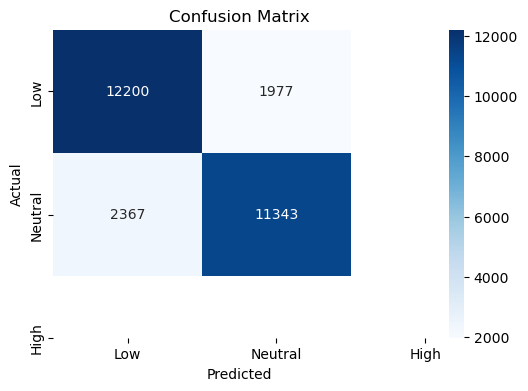

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualize confusion matrix with heatmap
plt.figure(figsize= (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Neutral", "High"], yticklabels=["Low", "Neutral", "High"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()